<a href="https://colab.research.google.com/github/arjunravi26/Flower-Detection/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
IMAGE_SHAPE = (224, 224)

In [4]:
mobile_net_v2_model = tf.keras.applications.MobileNetV2(
    input_shape=IMAGE_SHAPE + (3,),
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [5]:
classifier = tf.keras.Sequential([
    mobile_net_v2_model

])

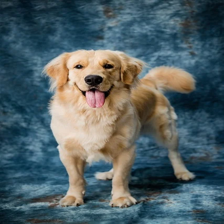

In [6]:
gold_fish = Image.open("/content/dog-8198719_640.webp").resize(IMAGE_SHAPE)
gold_fish

In [7]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [9]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 6s 6s/step


(1, 1000)

In [10]:
result

array([[5.21031943e-05, 3.96778851e-05, 2.17060515e-05, 1.67593389e-05,
        3.11399963e-05, 2.63320180e-05, 3.51343588e-05, 2.98838750e-05,
        2.66391835e-05, 1.40398306e-05, 4.08952546e-05, 5.25309806e-05,
        4.19128337e-05, 3.05952635e-05, 3.39554826e-05, 2.20163347e-05,
        2.51029778e-05, 3.69764130e-05, 1.34972352e-05, 7.23264675e-05,
        4.23000965e-05, 4.84597113e-05, 6.60302030e-05, 9.45556749e-05,
        1.07951528e-05, 2.89884028e-05, 2.17725410e-05, 1.61027801e-05,
        3.10912947e-05, 1.11206327e-05, 1.07698208e-04, 1.85465105e-05,
        2.75824004e-05, 1.11337438e-04, 1.13674978e-04, 9.07009307e-05,
        2.33026803e-05, 1.14121685e-05, 9.62360573e-05, 4.05473002e-05,
        2.50783305e-05, 6.36438854e-05, 3.08858762e-05, 4.85906749e-05,
        4.91698265e-05, 2.45103838e-05, 3.95666029e-05, 2.78755360e-05,
        2.80753902e-05, 5.04437849e-05, 6.41053848e-05, 3.83861116e-05,
        2.46361142e-05, 2.99122457e-05, 5.06948563e-05, 2.011228

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

207

In [12]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [13]:
imagenet_labels[predicted_label_index+1]

'golden retriever'

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/15802657001_40fe77c030_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2300959680_8d22fa5ee2.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg')]

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [18]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/15802657001_40fe77c030_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2300959680_8d22fa5ee2.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg')]

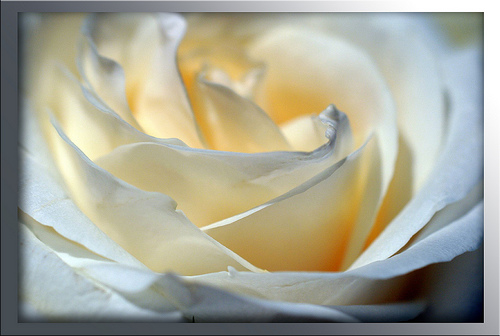

In [19]:
PIL.Image.open(str(roses[1]))

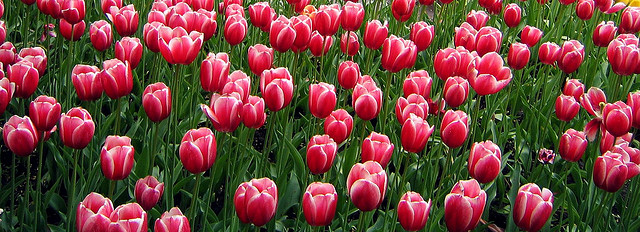

In [20]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [21]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [22]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [23]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [24]:
img.shape

(240, 159, 3)

In [25]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [26]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [27]:
X = np.array(X)
y = np.array(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [30]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [31]:
IMAGE_SHAPE

(224, 224)

In [32]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

In [33]:
x0_resized.shape

(224, 224, 3)

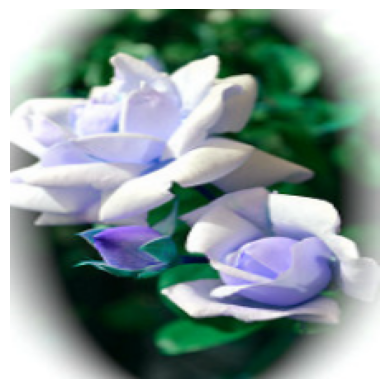

In [34]:
plt.axis('off')
plt.imshow(X[0])

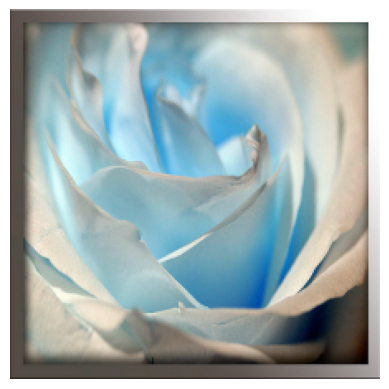

In [35]:
plt.axis('off')
plt.imshow(X[1])

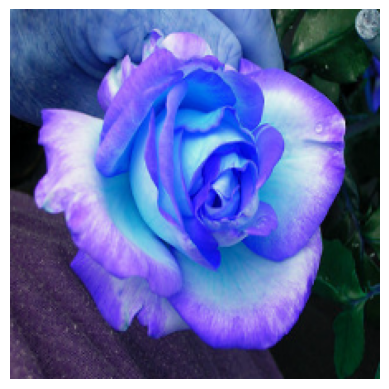

In [36]:
plt.axis('off')
plt.imshow(X[2])

In [37]:
results = classifier.predict(np.array([X[0],X[1],X[2]]))

1/1 [==============================] - 2s 2s/step


In [38]:
predicted = np.argmax(results, axis=1)

In [39]:
predicted

array([721, 721, 794])

In [40]:
imagenet_labels[predicted[0]+1]

'pillow'

In [41]:
imagenet_labels[predicted[1]+1]

'pillow'

In [42]:
imagenet_labels[predicted[2]+1]

'shower curtain'

In [43]:
# Load MobileNetV2 pre-trained on ImageNet without the top layer
pretrained_model_without_top_layer = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)


In [44]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_of_flowers)
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 2230277 (8.51 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [46]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_scaled, y_test)

In [ ]:
predictions = model.predict(X_train_scaled[0])

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

In [ ]:
predicted_class_index

In [ ]:
predicted_label = imagenet_labels[predicted_class_index+1]

print(f"Predicted class: {predicted_class_index}, Label: {predicted_label}")